This is going to be the similar mass case with circular orbit and then implement Df equation with that


How this Jupyter Notebook will look like:
- Initialize the packets
- initial conditions
- dictate the circular orbit
- forloop
- effective energy plot (coming soon)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import scipy as sci
from scipy import integrate
from scipy.integrate import odeint
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import astropy.constants as const
import math

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
#this is to make the font of the plots to be Times New Roman

In [3]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

This is the tests that were done in Kris' github:

In [4]:
a_0 = 2.95 
b_0 = 0.596
mstar_tot = 1e11 * u.Msun
r_eff = (a_0*(mstar_tot/(1.e6*u.Msun))**b_0)* u.pc

print(r_eff)

2817.2281287632354 pc


In [5]:
m1 = 4e8 * u.Msun

rb = (m1/mstar_tot)**(1./3.)*r_eff
print("Binary radius is:", rb)
dyn_hard = (((rb/r_eff)**3)*r_eff).to(u.pc)
print(dyn_hard)

Binary radius is: 447.20708952331626 pc
11.268912515052946 pc


This is going to be the initial conditions

In [6]:
plt.rcParams['font.family'] = 'Times New Roman'
# region Code Snippet 1: IC's
G = const.G #change the innate time to years
m_gal = 1e11 * const.M_sun
#Masses
m1=4e8 * const.M_sun #mass of black hole A 
m2=4e8 * const.M_sun #mass of black hole B
# Will be adding the Standard Gravitational Parameter
#r_i has a separation of 430 pc
sep = 430*u.pc
r1_initial=[((sep/2.).value),0,0] * u.pc
r2_initial=[-((sep/2.).value),0,0] * u.pc
#To arrays
r1=np.array(r1_initial,dtype="float64") * u.pc
r2=np.array(r2_initial,dtype="float64") * u.pc

#Semi-major axis 
a = (0.5 * (sep))
print (a)

#COM
r_com=(m1*r1+m2*r2)/(m1+m2)

#orbital veloctiy
orb_v = (np.sqrt(const.G*(m1+m2)/a)).to(u.km/u.s) #added with Kris' source
print(orb_v)

#V_i
v1_initial=[0,(orb_v.value), 0] *u.km/u.s
v2_inital=[0,-(orb_v.value),0] *u.km/u.s #km/s

#To arrays
v1=np.array(v1_initial,dtype="float64") *u.km/u.s
v2=np.array(v2_inital,dtype="float64") *u.km/u.s
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

r = np.sqrt((r2[0] - r1[0])** 2 + (r2[1] - r1[1])** 2 + (r2[2] - r1[2])** 2)

# endregion

print(v1, v2)

215.0 pc
126.50459714101072 km / s
[  0.         126.50459714   0.        ] km / s [   0.         -126.50459714    0.        ] km / s


In [7]:
orb_v = (np.sqrt(const.G*(m1+m2)/a)).to(u.km/u.s)
print(orb_v)

126.50459714101072 km / s


Dynamical Friction and adding them as each component:

In [8]:
# region Code Snippet 2: DF
r1_com = r1 - r_com
r2_com = r2 - r_com

r1_com = np.sqrt(r1_com[0]**2 + r1_com[1]**2 + r1_com[2]**2) #we have to put the magnitude of the distance from each object from the COM
r2_com = np.sqrt(r2_com[0]**2 + r2_com[1]**2 + r2_com[2]**2)
 # region code : Semi Major Axes
#redacted the a becuase r = a in circular orbits
# rmax1 = np.max(r1 - r_com)
# rmin1 = np.min(r1 - r_com)
# a1 = (rmax1+rmin1)/2

# rmax2 = np.max(r2 - r_com)
# rmin2 = np.min(r2 - r_com)
# a2 = (rmax2+rmin2)/2
# endregion

o = ((10**(2.2969))*(m_gal/ (10**(11) * const.M_sun))**(0.299)) * (u.km/u.s)
# region code : Coulomb Logarithm
x1 = (np.abs(r1_com.to(u.km)) * o**(2)) / (G * m1)
x2 = (np.abs(r2_com.to(u.km)) * o**(2)) / (G * m2)
ln_A1 = math.log10(x1.to_value(u.dimensionless_unscaled))
ln_A2 = math.log10(x2.to_value(u.dimensionless_unscaled))
# endregion

F_D1 = 0.428 * ln_A1 * ((G * m1**(2))/r1_com**(2))
F_D2 = 0.428 * ln_A2 * ((G * m2**(2))/r2_com**(2))

print(v1, v2)
v_r1 = v1 - v_com 
v_r2 = v2 - v_com
print(v_r1, v_r2)
v_rmag1 = np.sqrt(v_r1[0]**2 + v_r1[1]**2 + v_r1[2]**2)
v_rmag2 = np.sqrt(v_r2[0]**2 + v_r2[1]**2 + v_r2[2]**2)

print(v_rmag1, v_rmag2) 

v_rel_unit1 = (v_r1 / v_rmag1)
v_rel_unit2 = (v_r2 / v_rmag2)

print(v_rel_unit1, v_rel_unit2)



# region code: Dynamical Friction Component to Array for BH A
F_D1_i = (F_D1 * -v_rel_unit1[0])
F_D1_j = (F_D1 * -v_rel_unit1[1])
F_D1_k = (F_D1 * -v_rel_unit1[2])
    
F_D1 = np.array([F_D1_i.to((u.kg*u.m)/(u.s**2)).value, F_D1_j.to((u.kg*u.m)/ (u.s**2)).value, F_D1_k.to((u.kg*u.m)/ (u.s**2)).value])
# endregion

# region code: Dynamical Friction Component to Array for BH B
F_D2_i = (F_D2 * -v_rel_unit2[0])
F_D2_j = (F_D2 * -v_rel_unit2[1])
F_D2_k = (F_D2 * -v_rel_unit2[2])
    
F_D2 = np.array([F_D2_i.to((u.kg*u.m)/(u.s**2)).value, F_D2_j.to((u.kg*u.m)/ (u.s**2)).value, F_D2_k.to((u.kg*u.m)/ (u.s**2)).value])
# endregion


F_D1 = F_D1 * ((u.kg * u.m)/(u.s**2))
F_D2 = F_D2 * ((u.kg * u.m)/(u.s**2))
    

F_D1_accel = (F_D1 / m1).to(u.km / u.s**2)
F_D2_accel = (F_D2 / m2).to(u.km / u.s**2)
print(F_D1_accel, F_D2_accel)



[  0.         126.50459714   0.        ] km / s [   0.         -126.50459714    0.        ] km / s
[  0.         126.50459714   0.        ] km / s [   0.         -126.50459714    0.        ] km / s
126.50459714101072 km / s 126.50459714101072 km / s
[0. 1. 0.] [ 0. -1.  0.]
[-0.00000000e+00 -3.56512603e-13 -0.00000000e+00] km / s2 [-0.00000000e+00  3.56512603e-13 -0.00000000e+00] km / s2


In [9]:
massterm = (m1+m2)/(10**8*u.Msun)
velterm = ((200*u.km/u.s)/o)**2
dynhard_rad = (10*u.pc*massterm*velterm).to(u.pc)
print(dynhard_rad)

81.5361082035837 pc


In [10]:
coulomb_log_ = np.log10((a*o**2/(const.G*m1)).to(''))
print(coulomb_log_)
prefactor = 19./coulomb_log_
aterm = (a/(5.*u.kpc))**2
vterm = o/(200*u.km/u.s)
mterm = (10**8*u.Msun/(m1))
dyntime = (prefactor*aterm*vterm*mterm*u.Gyr).to(u.Myr)
print(dyntime)

0.6906173797913483
12.596880855045313 Myr


In [11]:
((0.428*(coulomb_log_)*(const.G*(m1**2)/(a.to(u.m)**2))) / m1).to(u.km / u.s**2)

<Quantity 3.56512603e-13 km / s2>

did all the checks that would dictate when they become a hard binary

In [12]:
T = dyntime
N = 50
delta_t = T/ N


dv1bydt= ((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) + F_D1_accel
dv2bydt= ((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2)  + F_D2_accel
dr1bydt = v1  # maybe we don't need df subtraction here
dr2bydt = v2 
r_derivs=np.concatenate((dr1bydt.value,dr2bydt.value))
derivs=np.concatenate((r_derivs,dv1bydt.value,dv2bydt.value))

time_span=np.linspace(0, T, N) #Work on this with Kris' link


In [13]:
c = 1

Period Test

In [14]:
orbital_period = np.sqrt((4 * (np.pi)**2 / (G * (m1)) * (a**3))).to(u.Myr)

print(orbital_period)

14.766364899677814 Myr


orbital period / dyntime

In [15]:
dyntime / orbital_period

<Quantity 0.85307934>

In [16]:
r1.shape

(3,)

put in function; reset local variables once used; keplers third law ( how many orbts to expect) = easiest version of the question

In [17]:
def two_body_equations(G_, m1_, m2_, r1_, r2_, r_):
    r1 = r1_.copy()
    r2 = r2_.copy()
    dv1bydt=((G_*m2_*(r2-r1))/r_**3).to(u.km / u.s**2) 
    dv2bydt=((-G_*m1_*(r2-r1))/r_**3).to(u.km / u.s**2) 
    v1 += dv1bydt * delta_t
    v2 += dv2bydt * delta_t
    r1 += v1.to(u.pc / u.s) * delta_t
    r2 += v2.to(u.pc / u.s) * delta_t

    return 


def df_function(G_, m1_, m2_, r1_, r2_, F_D1_, F_D2_, m_gal_, v1_, v2_, delta_t_):
    r1 = r1_.copy()
    r2 = r2_.copy()
    v1 = v1_.copy()
    v2 = v2_.copy()
    F_D1 = F_D1_.copy()
    F_D2 = F_D2_.copy()

    r1_sol = [r1.copy()]
    r2_sol = [r2.copy()]
    v1_sol = [v1.copy()]
    v2_sol = [v2.copy()]
    F_D1sol = [F_D1.copy()]
    F_D2sol = [F_D2.copy()]

    for i in range(1, N):
        F_D1_accel = (F_D1 / m1).to(u.km / u.s**2)  #make sure acceleration is in the variable name
        F_D2_accel = (F_D2 / m2).to(u.km / u.s**2)
        r = np.sqrt((r2[0] - r1[0])**2 + (r2[1] - r1[1])**2 + (r2[2] - r1[2])**2)
        dv1bydt=((G_*m2_*(r2-r1))/r**3).to(u.km / u.s**2) + (c * F_D1_accel)
        dv2bydt=((-G_*m1_*(r2-r1))/r**3).to(u.km / u.s**2) + (c * F_D2_accel)
        v1 += dv1bydt * delta_t_
        v2 += dv2bydt * delta_t_

        r1 += v1.to(u.pc / u.s) * delta_t_
        r2 += v2.to(u.pc / u.s) * delta_t_
        # region Code Snippet 2: DF
        r1_com = r1 - r_com
        r2_com = r2 - r_com

        r1_com = np.sqrt(r1_com[0]**2 + r1_com[1]**2 + r1_com[2]**2) #we have to put the magnitude of the distance from each object from the COM
        r2_com = np.sqrt(r2_com[0]**2 + r2_com[1]**2 + r2_com[2]**2)
        # region code : Semi Major Axes
        #redacted the a becuase r = a in circular orbits
        # rmax1 = np.max(r1 - r_com)
        # rmin1 = np.min(r1 - r_com)
        # a1 = (rmax1+rmin1)/2

        # rmax2 = np.max(r2 - r_com)
        # rmin2 = np.min(r2 - r_com)
        # a2 = (rmax2+rmin2)/2
        # endregion

        o = ((10**(2.2969))*(m_gal_/ (10**(11) * const.M_sun))**(0.299)) * (u.km/u.s)
        # region code : Coulomb Logarithm
        x1 = (np.abs(r1_com.to(u.km)) * o**(2)) / (G_ * m1_)
        x2 = (np.abs(r2_com.to(u.km)) * o**(2)) / (G_* m2_)
        ln_A1 = math.log10(x1.to_value(u.dimensionless_unscaled))
        ln_A2 = math.log10(x2.to_value(u.dimensionless_unscaled))
        # endregion

        F_D1 = 0.428 * ln_A1 * ((G_ * m1_**(2))/r1_com**(2))
        F_D2 = 0.428 * ln_A2 * ((G_ * m2_**(2))/r2_com**(2))


        v_r1 = v1 - v_com 
        v_r2 = v2 - v_com

        v_rmag1 = np.sqrt(v_r1[0]**2 + v_r1[1]**2 + v_r1[2]**2)
        v_rmag2 = np.sqrt(v_r2[0]**2 + v_r2[1]**2 + v_r2[2]**2) #will be doing this from now on though linalg.norm does the same

        v_rel_unit1 = (v_r1 / v_rmag1)
        v_rel_unit2 = (v_r2 / v_rmag2)

        # region code: Dynamical Friction Component to Array for BH A
        F_D1_i = (F_D1 * -v_rel_unit1[0])
        F_D1_j = (F_D1 * -v_rel_unit1[1])
        F_D1_k = (F_D1 * -v_rel_unit1[2])
            
        F_D1 = np.array([F_D1_i.to((u.kg*u.m)/(u.s**2)).value, F_D1_j.to((u.kg*u.m)/ (u.s**2)).value, F_D1_k.to((u.kg*u.m)/ (u.s**2)).value])
        # endregion

        # region code: Dynamical Friction Component to Array for BH B
        F_D2_i = (F_D2 * -v_rel_unit2[0])
        F_D2_j = (F_D2 * -v_rel_unit2[1])
        F_D2_k = (F_D2 * -v_rel_unit2[2])
            
        F_D2 = np.array([F_D2_i.to((u.kg*u.m)/(u.s**2)).value, F_D2_j.to((u.kg*u.m)/ (u.s**2)).value, F_D2_k.to((u.kg*u.m)/ (u.s**2)).value])
        # endregion


        F_D1 = F_D1 * ((u.kg * u.m)/(u.s**2))
        F_D2 = F_D2 * ((u.kg * u.m)/(u.s**2))
            

        F_D1_accel = (F_D1 / m1).to(u.km / u.s**2)  #make sure acceleration is in the variable name
        F_D2_accel = (F_D2 / m2).to(u.km / u.s**2)

        



        F_D1sol.append([

            (F_D1[0]).value,
            (F_D1[1]).value,
            (F_D1[2]).value
        ])
        F_D2sol.append([

            (F_D2[0]).value,
            (F_D2[1]).value,
            (F_D2[2]).value
        ])

        r1_sol.append(r1.copy())
        r2_sol.append(r2.copy())
        v1_sol.append(v1.copy())
        v2_sol.append(v2.copy())
    time_values = np.arange(0, N) * delta_t_.to(u.Myr).value  # Convert delta_t to Myr or desired unit

    r1_sol = np.array(r1_sol)  
    r2_sol = np.array(r2_sol)  
    v1_sol = np.array(v1_sol)  
    v2_sol = np.array(v2_sol) 
    F_D1sol = np.array(F_D1sol)
    F_D2sol = np.array(F_D2sol)

    return r1_sol, r2_sol, v1_sol, v2_sol, F_D1sol, F_D2sol, time_values


r1_sol, r2_sol, v1_sol, v2_sol, F_D1sol, F_D2sol, time_values = df_function(G, m1, m2, r1, r2, F_D1, F_D2, m_gal, v1, v2, delta_t)





In [18]:
r1_sol.shape

(50, 3)

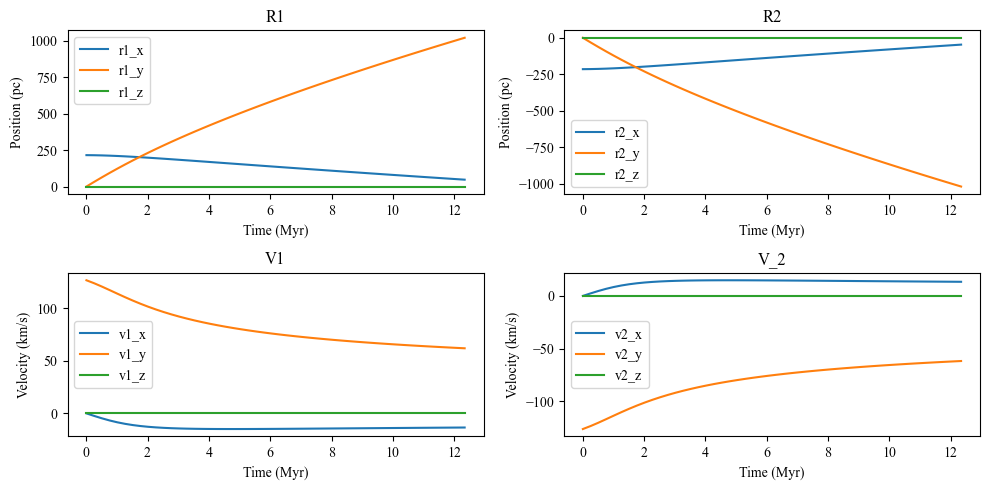

In [19]:
# region code
# r1_sol = []
# r2_sol = []
# v1_sol = []
# v2_sol = []
# F_D1sol = []
# F_D2sol = []



# for i in range(N):
#     dv1bydt=((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) + (2 * F_D1)
#     dv2bydt=((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2) + (2 * F_D2) 
#     v1 += dv1bydt * delta_t
#     v2 += dv2bydt * delta_t

#     r1 += v1.to(u.pc / u.s) * delta_t
#     r2 += v2.to(u.pc / u.s) * delta_t
#     # region Code Snippet 2: DF
#     r1_com = r1 - r_com
#     r2_com = r2 - r_com

#     r1_com = np.sqrt(r1_com[0]**2 + r1_com[1]**2 + r1_com[2]**2) #we have to put the magnitude of the distance from each object from the COM
#     r2_com = np.sqrt(r2_com[0]**2 + r2_com[1]**2 + r2_com[2]**2)
#     # region code : Semi Major Axes
#     #redacted the a becuase r = a in circular orbits
#     # rmax1 = np.max(r1 - r_com)
#     # rmin1 = np.min(r1 - r_com)
#     # a1 = (rmax1+rmin1)/2

#     # rmax2 = np.max(r2 - r_com)
#     # rmin2 = np.min(r2 - r_com)
#     # a2 = (rmax2+rmin2)/2
#     # endregion

#     o = ((10**(2.2969))*(m_gal/ (10**(11) * const.M_sun))**(0.299)) * (u.km/u.s)
#     # region code : Coulomb Logarithm
#     x1 = (np.abs(r1_com.to(u.km)) * o**(2)) / (G * m1)
#     x2 = (np.abs(r2_com.to(u.km)) * o**(2)) / (G * m2)
#     ln_A1 = math.log10(x1.to_value(u.dimensionless_unscaled))
#     ln_A2 = math.log10(x2.to_value(u.dimensionless_unscaled))
#     # endregion

#     F_D1 = 0.428 * ln_A1 * ((G * m1**(2))/r1_com**(2))
#     F_D2 = 0.428 * ln_A2 * ((G * m2**(2))/r2_com**(2))


#     v_r1 = v1 - v_com 
#     v_r2 = v2 - v_com

#     v_rmag1 = np.sqrt(v_r1[0]**2 + v_r1[1]**2 + v_r1[2]**2)
#     v_rmag2 = np.sqrt(v_r2[0]**2 + v_r2[1]**2 + v_r2[2]**2) #will be doing this from now on though linalg.norm does the same

#     v_rel_unit1 = (v_r1 / v_rmag1)
#     v_rel_unit2 = (v_r2 / v_rmag2)

#     # region code: Dynamical Friction Component to Array for BH A
#     F_D1_i = (F_D1 * -v_rel_unit1[0])
#     F_D1_j = (F_D1 * -v_rel_unit1[1])
#     F_D1_k = (F_D1 * -v_rel_unit1[2])
        
#     F_D1 = np.array([F_D1_i.to((u.kg*u.m)/(u.s**2)).value, F_D1_j.to((u.kg*u.m)/ (u.s**2)).value, F_D1_k.to((u.kg*u.m)/ (u.s**2)).value])
#     # endregion

#     # region code: Dynamical Friction Component to Array for BH B
#     F_D2_i = (F_D2 * -v_rel_unit2[0])
#     F_D2_j = (F_D2 * -v_rel_unit2[1])
#     F_D2_k = (F_D2 * -v_rel_unit2[2])
        
#     F_D2 = np.array([F_D2_i.to((u.kg*u.m)/(u.s**2)).value, F_D2_j.to((u.kg*u.m)/ (u.s**2)).value, F_D2_k.to((u.kg*u.m)/ (u.s**2)).value])
#     # endregion


#     F_D1 = F_D1 * ((u.kg * u.m)/(u.s**2))
#     F_D2 = F_D2 * ((u.kg * u.m)/(u.s**2))
        

#     F_D1 = (F_D1 / m1).to(u.km / u.s**2)
#     F_D2 = (F_D2 / m2).to(u.km / u.s**2)
#     F_D1sol.append([

#         (F_D1_i.to((u.kg * u.m) / (u.s**2))/m1).value,
#         (F_D1_j.to((u.kg * u.m) / (u.s**2))/m1).value,
#         (F_D1_k.to((u.kg * u.m) / (u.s**2))/m1).value
#     ])
#     F_D2sol.append([

#         (F_D2_i.to((u.kg * u.m) / (u.s**2))/m2).value,
#         (F_D2_j.to((u.kg * u.m) / (u.s**2))/m2).value,
#         (F_D2_k.to((u.kg * u.m) / (u.s**2))/m2).value
#     ])




#     r1_sol.append(r1.copy())
#     r2_sol.append(r2.copy())
#     v1_sol.append(v1.copy())
#     v2_sol.append(v2.copy())


# time_values = np.arange(0, N) * delta_t.to(u.Myr).value  # Convert delta_t to Myr or desired unit


# r1_sol = np.array(r1_sol)  
# r2_sol = np.array(r2_sol)  
# v1_sol = np.array(v1_sol)  
# v2_sol = np.array(v2_sol) 
# F_D1sol = np.array(F_D1sol)
# F_D2sol = np.array(F_D2sol)
# print(F_D1sol, F_D2sol)


# endregion 
# region

 
fig, axs = plt.subplots(2, 2, figsize=(10, 5))


axs[0, 0].plot(time_values, r1_sol[:, 0], label="r1_x")
axs[0, 0].plot(time_values, r1_sol[:, 1], label="r1_y")
axs[0, 0].plot(time_values, r1_sol[:, 2], label="r1_z")
axs[0, 0].set_title("R1")
axs[0, 0].set_xlabel("Time (Myr)")
axs[0, 0].set_ylabel("Position (pc)")
axs[0, 0].legend()


axs[0, 1].plot(time_values, r2_sol[:, 0], label="r2_x")
axs[0, 1].plot(time_values, r2_sol[:, 1], label="r2_y")
axs[0, 1].plot(time_values, r2_sol[:, 2], label="r2_z")
axs[0, 1].set_title("R2")
axs[0, 1].set_xlabel("Time (Myr)")
axs[0, 1].set_ylabel("Position (pc)")
axs[0, 1].legend()


axs[1, 0].plot(time_values, v1_sol[:, 0], label="v1_x")
axs[1, 0].plot(time_values, v1_sol[:, 1], label="v1_y")
axs[1, 0].plot(time_values, v1_sol[:, 2], label="v1_z")
axs[1, 0].set_title("V1")
axs[1, 0].set_xlabel("Time (Myr)")
axs[1, 0].set_ylabel("Velocity (km/s)")
axs[1, 0].legend()


axs[1, 1].plot(time_values, v2_sol[:, 0], label="v2_x")
axs[1, 1].plot(time_values, v2_sol[:, 1], label="v2_y")
axs[1, 1].plot(time_values, v2_sol[:, 2], label="v2_z")
axs[1, 1].set_title("V_2")
axs[1, 1].set_xlabel("Time (Myr)")
axs[1, 1].set_ylabel("Velocity (km/s)")
axs[1, 1].legend()


plt.tight_layout()
plt.show()

# endregion
    


In [20]:
r2_sol[-1]

array([  -46.96807225, -1018.86249947,     0.        ])

In [21]:
r1_sol[-1]

array([  46.96807225, 1018.86249947,    0.        ])

*mag of velocity + separation vector

In [22]:
r1_sol = np.array(r1_sol)
r2_sol = np.array(r2_sol)



finalsep = r1_sol[-1] - r2_sol[-1]

print(finalsep)

[  93.9361445  2037.72499895    0.        ]


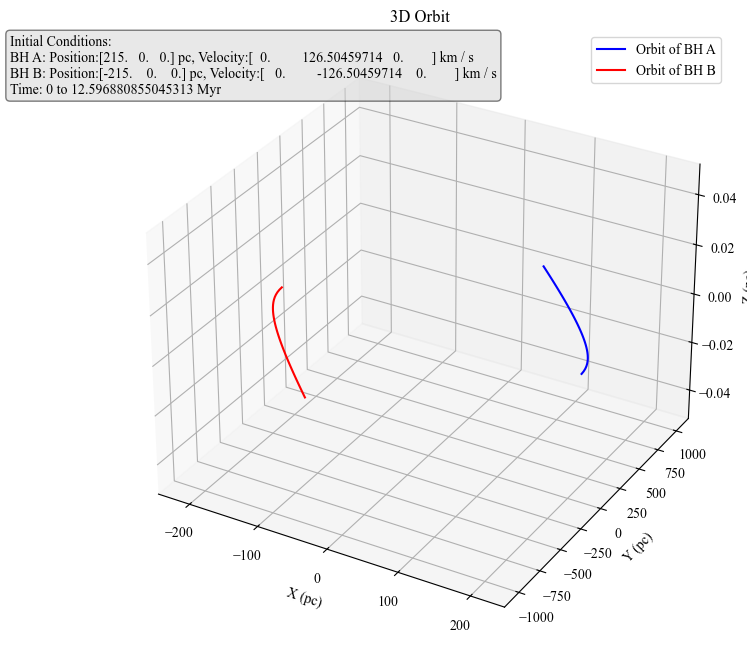

In [23]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], label="Orbit of BH A", color="blue")


ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], label="Orbit of BH B", color="red")


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)') 
ax.set_zlabel('Z (pc)')
ax.set_title('3D Orbit')


ax.legend()

initial_conditions_text = (
    f"Initial Conditions:\n"
    f"BH A: Position:{r1_initial}, Velocity:{v1_initial}\n"
    f"BH B: Position:{r2_initial}, Velocity:{v2_inital}\n"
    f"Time: 0 to {T}"
)
fig.text(0, 0.8, initial_conditions_text, fontsize=10, bbox=dict(boxstyle="round", facecolor="lightgray", alpha=0.5))

plt.show()

AttributeError: 'Axes' object has no attribute 'set_zlabel'

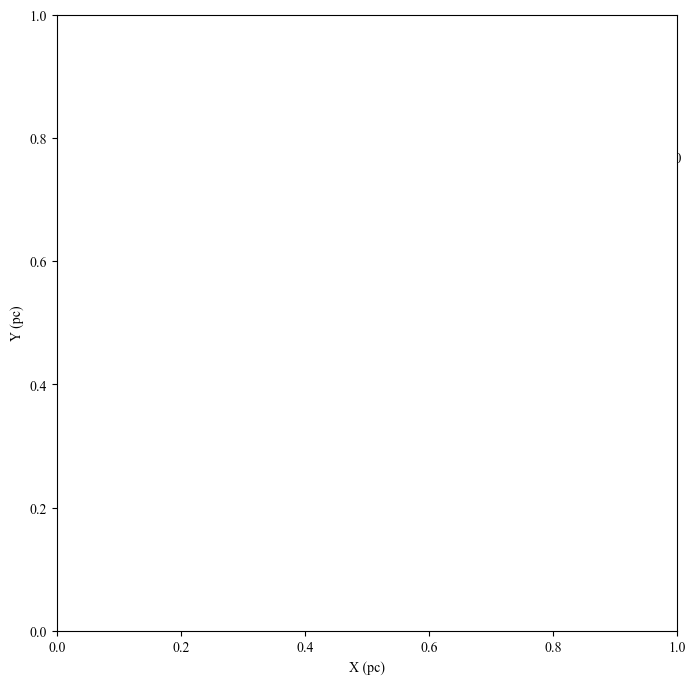

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)')
ax.set_zlabel('Z (pc)')
ax.set_title('Orbit Throughout Time')


line1, = ax.plot([], [], [], label="Orbit of BH A", color="blue")
line2, = ax.plot([], [], [], label="Orbit of BH B", color="red")
ax.legend()

# Limits for the plot (adjust as needed based on data)
ax.set_xlim([min(np.min(r1_sol[:, 0]), np.min(r2_sol[:, 0])), max(np.max(r1_sol[:, 0]), np.max(r2_sol[:, 0]))])
ax.set_ylim([min(np.min(r1_sol[:, 1]), np.min(r2_sol[:, 1])), max(np.max(r1_sol[:, 1]), np.max(r2_sol[:, 1]))])
ax.set_zlim([min(np.min(r1_sol[:, 2]), np.min(r2_sol[:, 2])), max(np.max(r1_sol[:, 2]), np.max(r2_sol[:, 2]))])


def update(num):

    line1.set_data(r1_sol[:num, 0], r1_sol[:num, 1])
    line1.set_3d_properties(r1_sol[:num, 2])
    
    line2.set_data(r2_sol[:num, 0], r2_sol[:num, 1])
    line2.set_3d_properties(r2_sol[:num, 2])
    
    return line1, line2

initial_conditions_text = (
    f"Initial Conditions:\n"
    f"BH A: Position:{r1_initial}, Velocity:{v1_initial}\n"
    f"BH B: Position:{r2_initial}, Velocity:{v2_inital}\n"
    f"Time: 0 to {T}"
)
fig.text(0, 0.8, initial_conditions_text, fontsize=10, bbox=dict(boxstyle="round", facecolor="lightgray", alpha=0.5))

# ani = FuncAnimation(fig, update, frames=len(r1_sol), interval=50, blit=True)


# plt.show()


# ani.save("J1010#6.mp4", writer="ffmpeg", fps=220)  # Adjust fps as needed

Plot of Velocities

In [ ]:
F_D1sol.shape

(5000, 3)

Dynamical Friction Plot

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

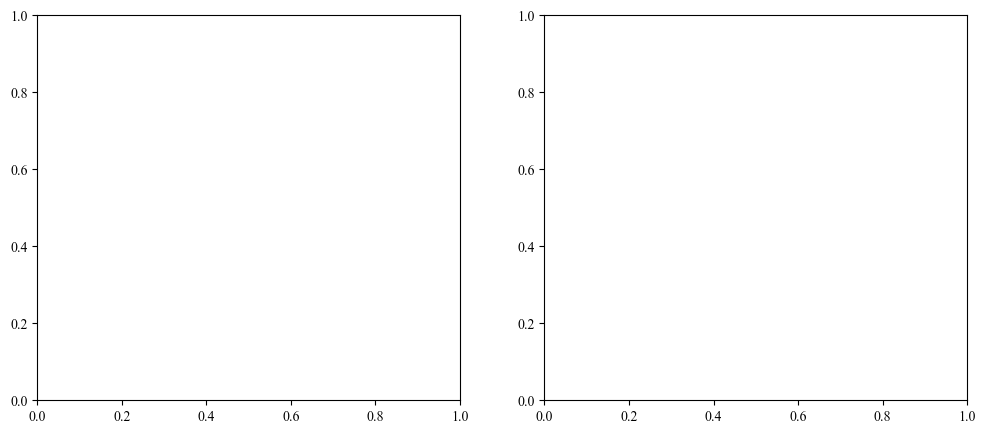

In [ ]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]  

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

for c in c_values:
    r1_sol = []
    r2_sol = []
    v1_sol = []
    v2_sol = []
    F_D1sol = []
    F_D2sol = []


    for i in range(N):
        dv1bydt=((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) + (c * F_D1)
        dv2bydt=((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2) + (c * F_D2) 
        v1 += dv1bydt * delta_t
        v2 += dv2bydt * delta_t

        r1 += v1.to(u.pc / u.s) * delta_t
        r2 += v2.to(u.pc / u.s) * delta_t
        # region Code Snippet 2: DF
        r1_com = r1 - r_com
        r2_com = r2 - r_com

        r1_com = np.sqrt(r1_com[0]**2 + r1_com[1]**2 + r1_com[2]**2) #we have to put the magnitude of the distance from each object from the COM
        r2_com = np.sqrt(r2_com[0]**2 + r2_com[1]**2 + r2_com[2]**2)
        

        o = ((10**(2.2969))*(m_gal/ (10**(11) * const.M_sun))**(0.299)) * (u.km/u.s)
        # region code : Coulomb Logarithm
        x1 = (np.abs(r1_com.to(u.km)) * o**(2)) / (G * m1)
        x2 = (np.abs(r2_com.to(u.km)) * o**(2)) / (G * m2)
        ln_A1 = math.log10(x1.to_value(u.dimensionless_unscaled))
        ln_A2 = math.log10(x2.to_value(u.dimensionless_unscaled))
        # endregion

        F_D1 = 0.428 * ln_A1 * ((G * m1**(2))/r1_com**(2))
        F_D2 = 0.428 * ln_A2 * ((G * m2**(2))/r2_com**(2))


        v_r1 = v1 - v_com 
        v_r2 = v2 - v_com

        v_rmag1 = np.sqrt(v_r1[0]**2 + v_r1[1]**2 + v_r1[2]**2)
        v_rmag2 = np.sqrt(v_r2[0]**2 + v_r2[1]**2 + v_r2[2]**2) #will be doing this from now on though linalg.norm does the same

        v_rel_unit1 = (v_r1 / v_rmag1)
        v_rel_unit2 = (v_r2 / v_rmag2)

        # region code: Dynamical Friction Component to Array for BH A
        F_D1_i = (F_D1 * -v_rel_unit1[0])
        F_D1_j = (F_D1 * -v_rel_unit1[1])
        F_D1_k = (F_D1 * -v_rel_unit1[2])
            
        F_D1 = np.array([F_D1_i.to((u.kg*u.m)/(u.s**2)).value, F_D1_j.to((u.kg*u.m)/ (u.s**2)).value, F_D1_k.to((u.kg*u.m)/ (u.s**2)).value])
        # endregion

        # region code: Dynamical Friction Component to Array for BH B
        F_D2_i = (F_D2 * -v_rel_unit2[0])
        F_D2_j = (F_D2 * -v_rel_unit2[1])
        F_D2_k = (F_D2 * -v_rel_unit2[2])
            
        F_D2 = np.array([F_D2_i.to((u.kg*u.m)/(u.s**2)).value, F_D2_j.to((u.kg*u.m)/ (u.s**2)).value, F_D2_k.to((u.kg*u.m)/ (u.s**2)).value])
        # endregion


        F_D1 = F_D1 * ((u.kg * u.m)/(u.s**2))
        F_D2 = F_D2 * ((u.kg * u.m)/(u.s**2))
            

        F_D1 = (F_D1 / m1).to(u.km / u.s**2)
        F_D2 = (F_D2 / m2).to(u.km / u.s**2)
        F_D1sol.append([

            (F_D1_i.to((u.kg * u.m) / (u.s**2))/m1).value,
            (F_D1_j.to((u.kg * u.m) / (u.s**2))/m1).value,
            (F_D1_k.to((u.kg * u.m) / (u.s**2))/m1).value
        ])
        F_D2sol.append([

            (F_D2_i.to((u.kg * u.m) / (u.s**2))/m2).value,
            (F_D2_j.to((u.kg * u.m) / (u.s**2))/m2).value,
            (F_D2_k.to((u.kg * u.m) / (u.s**2))/m2).value
        ])

        r1_sol.append(r1.copy())
        r2_sol.append(r2.copy())
        v1_sol.append(v1.copy())
        v2_sol.append(v2.copy())


    F_D1sol = np.array(F_D1sol)
    F_D2sol = np.array(F_D2sol)


    mag_fd1 = np.sqrt(F_D1sol[:, 0]**2 + F_D1sol[:, 1]**2 + F_D1sol[:, 2]**2)
    mag_fd2 = np.sqrt(F_D2sol[:, 0]**2 + F_D2sol[:, 1]**2 + F_D2sol[:, 2]**2)


    axs[0].plot(time_values, mag_fd1, label=f"c = {c}")
    axs[1].plot(time_values, mag_fd2, label=f"c = {c}")


axs[0].set_title("Dynamical Friction - Body 1")
axs[0].set_xlabel("Time (Myr)")
axs[0].set_ylabel("Force Magnitude (km/s²)")
axs[0].legend()

axs[1].set_title("Dynamical Friction - Body 2")
axs[1].set_xlabel("Time (Myr)")
axs[1].set_ylabel("Force Magnitude (km/s²)")
axs[1].legend()

plt.tight_layout()
plt.show()

Testing separation levels here

In [ ]:
massterm = (m1+m2)/(10**8*u.Msun)
velterm = ((200*u.km/u.s)/o)**2
dynhard_rad = (10*u.pc*massterm*velterm).to(u.pc)
print(dynhard_rad) #this is the semi-major axis for when stellar hardening takes over from DF (so sep/2)

81.5361082035837 pc


In [ ]:
r1_sol[-1]

<Quantity [  16.18987711, -150.0958428 ,    0.        ] pc>

In [ ]:
r1_sol[0]

<Quantity [  16.19420377, -150.13595521,    0.        ] pc>